In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [178]:
import seaborn as sns

In [179]:
sd=pd.read_csv('sonar.csv', header=None)
sd

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [180]:
sd.shape

(208, 61)

In [181]:
print(sd.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

In [182]:
# Class distribution of our dataset
print(sd.groupby(60).size())
# sd[60].value_counts()

60
M    111
R     97
dtype: int64


In [183]:
sd.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

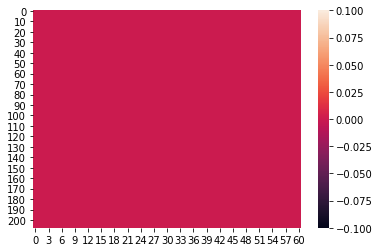

In [184]:
sns.heatmap(sd.isnull())

In [185]:
sns.heatmap?

In [186]:
# Correlation matrix
sdcor=sd.corr()
sdcor

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


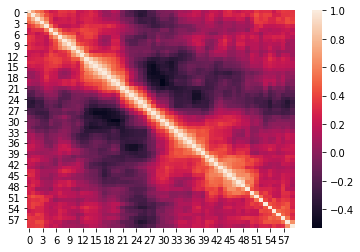

In [187]:
sns.heatmap(sdcor)

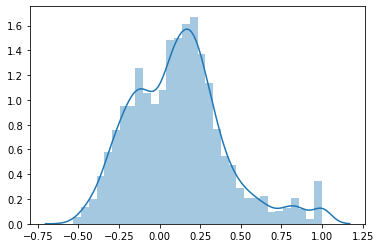

In [188]:
sns.distplot(sdcor)

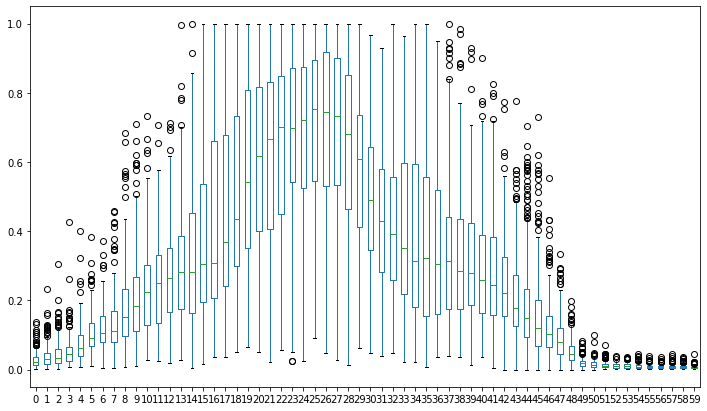

In [189]:
sd.plot.box(figsize=(12,7))

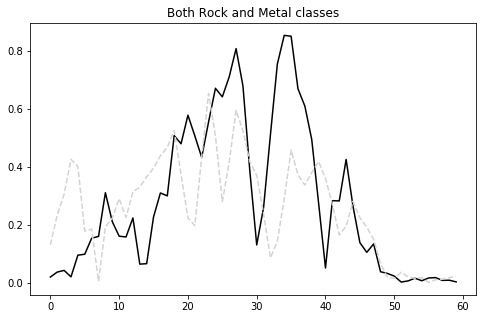

In [190]:
plt.figure(figsize=(8,5))
plt.plot(sd[sd[60]== 'R'].values[0][:-1], label='Rock', color='Black')
plt.plot(sd[sd[60]== 'M'].values[1][:-1], label='Metal', color='lightgray',linestyle='--')
plt.title('Both Rock and Metal classes')
plt.show()

In [191]:
sd.shape

(208, 61)

In [192]:
sd.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

In [193]:
for i in sd.columns:
    if sd[i].dtype == "object":
        print(i)

60


In [194]:
# are you getting why did you get this error?
#yes sir # what is the issue? can you tell me?
# sir column 60 datatype is object instead of int/float
# now clear? now you need to convert this data in numerical format.. using feature engineering 
# anything else? 
# sir i have completed 2 more project pls csn you pls check i will share the window
# you are in alloted practice projects? right?
# yes sir
# just submit them on github and you willget the feedback. its better that way, you will know each of your weakness.
# ok sir , but i have already shared a github link with you, these have 2 project , winedata set and titanic dataset
# you have to share the link on projects@datatrained.com, you would have got that in mail as well. let me show you what you have shared
# this is the link that you have shared with me
# https://github.com/pankaj118115304/pankaj118115304
# ok sir
# just submit your practice project and you will get your feedback, as i will not be able to see the whole project right now. you will get deatails where you are lacking and where you need to perform.
# got my point?
# ok sir , thnx
# no issues, so should  I close the ticket?
# yes sir , pls closed
# have a nice day bbye

In [195]:
sd[60]=pd.get_dummies(sd[60])

In [196]:
for col in sd.columns:
    if sd.skew().loc[col]>0.55:
        sd[col]=np.log1p(sd[col])

In [197]:
sd.skew()

0     2.036001
1     1.969917
2     2.344713
3     2.818320
4     1.698684
        ...   
56    1.629182
57    2.058207
58    1.713349
59    2.711412
60   -0.135903
Length: 61, dtype: float64

In [198]:
from scipy.stats import zscore
z=np.abs(zscore(sd))
z

array([[0.39934994, 0.02628801, 0.01002797, ..., 0.17553562, 0.66199906,
        1.06973356],
       [0.72491103, 0.44765863, 1.09908051, ..., 0.44442557, 0.42064156,
        1.06973356],
       [0.12128069, 0.6297828 , 1.76227694, ..., 0.25693559, 0.26164196,
        1.06973356],
       ...,
       [1.02680659, 0.1803522 , 0.69409005, ..., 0.03629322, 0.68212522,
        0.93481221],
       [0.06168251, 0.08287269, 0.15844551, ..., 0.70616332, 0.34025313,
        0.93481221],
       [0.13022441, 0.05142462, 0.81719454, ..., 0.29738111, 1.00151646,
        0.93481221]])

In [199]:
threshold=3
print(np.where(z>3))

(array([  2,   2,  19,  19,  20,  22,  22,  22,  22,  22,  22,  33,  44,
        44,  65,  85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,
        98,  98, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 135, 135, 135, 135,
       136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140, 140,
       141, 142, 142, 142, 143, 143, 144, 145, 145, 146, 146, 146, 146,
       146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 186, 186, 186],
      dtype=int64), array([ 8, 56,  4,  7,  5, 39, 40, 46, 47, 48, 49, 49, 42, 43, 58,  1,  2,
       56,  5,  6, 58, 59,  0,  1,  2,  3,  4, 59, 57, 55,  2,  3,  4, 57,
       13, 54, 57,  0, 53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  7,  8, 53,
       55,  0,  7,  8, 51,  9, 10,  2, 47, 51, 46, 48, 49, 50, 59, 53, 54,
       58, 45, 51, 51,  1, 49,  0, 42, 45, 46, 47, 50, 51,  4, 49, 52, 54,
       55, 56, 57, 44, 45, 46], dtype=int64))


In [200]:
z[2][56]

4.094057477586837

In [201]:
sdn=sd[(z<3).all(axis=1)]
sdn

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195,0
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390,0
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632,0
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356,0
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578,1
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678,1
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095,1
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789,1


In [202]:
sd.shape

(208, 61)

In [203]:
sdn.shape

(173, 61)

In [204]:
x=sdn.iloc[:,0:-1]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.022935,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.023814,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.010346,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181


In [205]:
y=sdn.iloc[:,-1]
y.head()

0    0
1    0
3    0
4    0
5    0
Name: 60, dtype: uint8

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [207]:
x_train.shape

(138, 60)

In [208]:
y_train.shape

(138,)

In [209]:
x_test.shape

(35, 60)

In [210]:
y_test.shape

(35,)

# Applying Classical machine learning algorithms

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [212]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.8285714285714286
[[17  3]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.80      0.80      0.80        15

    accuracy                           0.83        35
   macro avg       0.82      0.82      0.83        35
weighted avg       0.83      0.83      0.83        35



In [213]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

0.7428571428571429
[[14  6]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.67      0.80      0.73        15

    accuracy                           0.74        35
   macro avg       0.75      0.75      0.74        35
weighted avg       0.76      0.74      0.74        35



In [214]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.8
[[14  6]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.70      0.93      0.80        15

    accuracy                           0.80        35
   macro avg       0.82      0.82      0.80        35
weighted avg       0.83      0.80      0.80        35



In [215]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.8285714285714286
[[15  5]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.74      0.93      0.82        15

    accuracy                           0.83        35
   macro avg       0.84      0.84      0.83        35
weighted avg       0.85      0.83      0.83        35



In [216]:
svc=SVC(probability=True)
abc=AdaBoostClassifier(base_estimator=svc)
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

0.8571428571428571
[[17  3]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.81      0.87      0.84        15

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



In [217]:
svc=SVC(probability=True,kernel='linear')
abc=AdaBoostClassifier(base_estimator=svc)
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

0.8285714285714286
[[16  4]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.76      0.87      0.81        15

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.84      0.83      0.83        35

